In [0]:
#importing required modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report 
from sklearn import tree
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
#sns.set()

In [86]:
#reading csv file
data_m=pd.read_csv("/content/drive/My Drive/congree/congress.csv")
data_m


,Class,handi,wpcs,abr,pff,esa,rgs,astb,atnc,mxm,immi,scc,edus,srts,crime,dfex,eaas
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [87]:
#replacing ? with np.nan
for cols in data_m:
  data_m[cols]=data_m[cols].replace({"?":np.nan})
data_m

,Class,handi,wpcs,abr,pff,esa,rgs,astb,atnc,mxm,immi,scc,edus,srts,crime,dfex,eaas
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [0]:
#renaming column class with rep
datam=data_m.rename(columns={"Class":"rep"})
#replacing yes and no values with 1 and 0 for all column
for cols in datam:
  datam[cols]=datam[cols].replace({"y":1,"n":0})
#replacing class republican with 1 and democrat with 0
datam.rep=datam.rep.replace({"republican":1,"democrat":0})


In [89]:
#filling null values with mode values of the columns of each class
for cols in datam:
  datarep=datam[datam["rep"]==1]
  datadem=datam[datam["rep"]==0]
  datarep[cols]=datarep[cols].fillna(datarep[cols].mode()[0])
  datadem[cols]=datadem[cols].fillna(datadem[cols].mode()[0])
  datam=datarep.append(datadem)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [90]:
#checking wheather any column contain null values
datam.isna().any()

rep      False
handi    False
wpcs     False
abr      False
pff      False
esa      False
rgs      False
astb     False
atnc     False
mxm      False
immi     False
scc      False
edus     False
srts     False
crime    False
dfex     False
eaas     False
dtype: bool

In [91]:
#plotting correlation graph
plt.figure(figsize=(10,10))
corre=datam.corr()
corre=corre.abs()
#ax = sns.heatmap(corre,xticklabels=True, yticklabels=True)

<Figure size 720x720 with 0 Axes>

In [0]:
#dropping less correlated columns
datam=datam.drop(columns={"wpcs","immi"})

In [93]:
datam

,rep,handi,abr,pff,esa,rgs,astb,atnc,mxm,scc,edus,srts,crime,dfex,eaas
0,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
1,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
7,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
8,1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
426,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
428,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
429,0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [94]:
#splitting columns to x and y
x=datam.iloc[:,1:]
y=datam.iloc[:,0]
x,y

(     handi  abr  pff  esa  rgs  astb  ...  scc  edus  srts  crime  dfex  eaas
 0      0.0  0.0  1.0  1.0  1.0   0.0  ...  0.0   1.0   1.0    1.0   0.0   1.0
 1      0.0  0.0  1.0  1.0  1.0   0.0  ...  0.0   1.0   1.0    1.0   0.0   1.0
 7      0.0  0.0  1.0  1.0  1.0   0.0  ...  0.0   0.0   1.0    1.0   0.0   1.0
 8      0.0  0.0  1.0  1.0  1.0   0.0  ...  0.0   1.0   1.0    1.0   0.0   1.0
 10     0.0  0.0  1.0  1.0  0.0   0.0  ...  0.0   1.0   1.0    1.0   0.0   0.0
 ..     ...  ...  ...  ...  ...   ...  ...  ...   ...   ...    ...   ...   ...
 425    0.0  1.0  0.0  0.0  0.0   1.0  ...  1.0   0.0   0.0    0.0   1.0   1.0
 426    1.0  1.0  0.0  0.0  0.0   1.0  ...  0.0   0.0   0.0    0.0   1.0   1.0
 428    1.0  1.0  0.0  0.0  0.0   1.0  ...  0.0   0.0   1.0    0.0   1.0   1.0
 429    1.0  1.0  0.0  0.0  0.0   1.0  ...  0.0   1.0   0.0    0.0   1.0   1.0
 431    0.0  1.0  0.0  0.0  0.0   1.0  ...  0.0   0.0   0.0    0.0   0.0   1.0
 
 [435 rows x 14 columns], 0      1
 1      1
 7   

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
# x is the train data and y is the predicted value and test size is 30% 
#remaining 70 for training

Predicted values:
[0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0]      index  rep
0      182    0
1      211    1
2      300    1
3      143    0
4      254    0
..     ...  ...
126    196    0
127    371    0
128    281    1
129    298    0
130    386    0

[131 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.95      0.98      0.97        59

    accuracy                           0.97       131
   macro avg       0.97      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



[Text(255.75, 475.65000000000003, 'X[2] <= 0.5\ngini = 0.46\nsamples = 304\nvalue = [195, 109]'),
 Text(139.5, 339.75, 'X[1] <= 0.5\ngini = 0.011\nsamples = 186\nvalue = [185, 1]'),
 Text(93.0, 203.85000000000002, 'X[10] <= 0.5\ngini = 0.111\nsamples = 17\nvalue = [16, 1]'),
 Text(46.5, 67.94999999999999, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(139.5, 67.94999999999999, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(186.0, 203.85000000000002, 'gini = 0.0\nsamples = 169\nvalue = [169, 0]'),
 Text(372.0, 339.75, 'X[8] <= 0.5\ngini = 0.155\nsamples = 118\nvalue = [10, 108]'),
 Text(279.0, 203.85000000000002, 'X[1] <= 0.5\ngini = 0.04\nsamples = 97\nvalue = [2, 95]'),
 Text(232.5, 67.94999999999999, 'gini = 0.0\nsamples = 82\nvalue = [0, 82]'),
 Text(325.5, 67.94999999999999, 'gini = 0.231\nsamples = 15\nvalue = [2, 13]'),
 Text(465.0, 203.85000000000002, 'X[1] <= 0.5\ngini = 0.472\nsamples = 21\nvalue = [8, 13]'),
 Text(418.5, 67.94999999999999, 'gini = 0.355\nsamples = 1

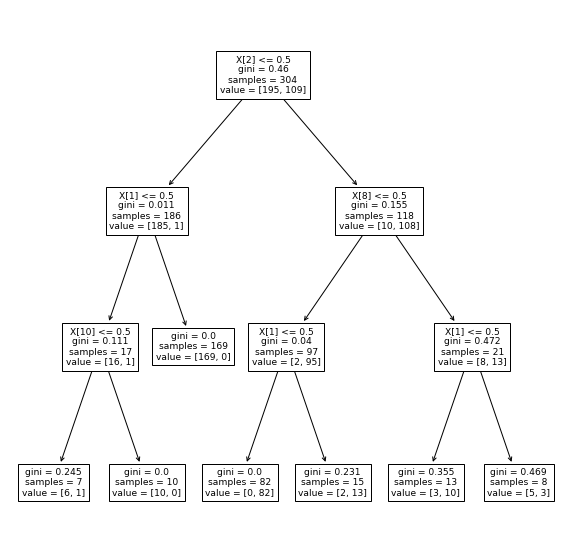

In [96]:
#doing decision tree classification with gini index
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100, min_samples_leaf=1,max_depth=3) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
model
y_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(y_pred,y_test.reset_index())
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
plt.figure(figsize=(10,10))

tree.plot_tree(model)


[0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0]      index  rep
0      182    0
1      211    1
2      300    1
3      143    0
4      254    0
..     ...  ...
126    196    0
127    371    0
128    281    1
129    298    0
130    386    0

[131 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.95      0.98      0.97        59

    accuracy                           0.97       131
   macro avg       0.97      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



[Text(255.75, 475.65000000000003, 'X[2] <= 0.5\nentropy = 0.941\nsamples = 304\nvalue = [195, 109]'),
 Text(139.5, 339.75, 'X[1] <= 0.5\nentropy = 0.048\nsamples = 186\nvalue = [185, 1]'),
 Text(93.0, 203.85000000000002, 'X[10] <= 0.5\nentropy = 0.323\nsamples = 17\nvalue = [16, 1]'),
 Text(46.5, 67.94999999999999, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(139.5, 67.94999999999999, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(186.0, 203.85000000000002, 'entropy = 0.0\nsamples = 169\nvalue = [169, 0]'),
 Text(372.0, 339.75, 'X[8] <= 0.5\nentropy = 0.419\nsamples = 118\nvalue = [10, 108]'),
 Text(279.0, 203.85000000000002, 'X[1] <= 0.5\nentropy = 0.145\nsamples = 97\nvalue = [2, 95]'),
 Text(232.5, 67.94999999999999, 'entropy = 0.0\nsamples = 82\nvalue = [0, 82]'),
 Text(325.5, 67.94999999999999, 'entropy = 0.567\nsamples = 15\nvalue = [2, 13]'),
 Text(465.0, 203.85000000000002, 'X[1] <= 0.5\nentropy = 0.959\nsamples = 21\nvalue = [8, 13]'),
 Text(418.5, 67.9499999

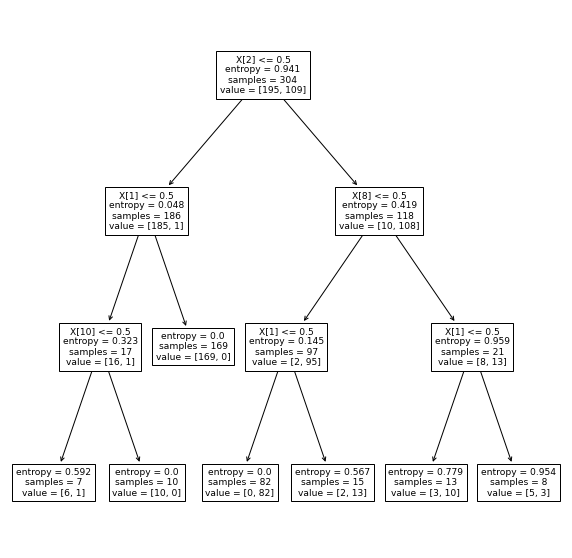

In [97]:
#doing decision tree classification with gini index
clf_gini = DecisionTreeClassifier(criterion = "entropy",random_state = 50,min_samples_leaf=1,max_depth=3) 
# Performing training 
model=clf_gini.fit(X_train, y_train) 
y_pred = clf_gini.predict(X_test) 
print(y_pred,y_test.reset_index())
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred))
#print("acc=",accuracy_score(data_sam_impure_bp['bp'],y_pred)*100)
from sklearn import tree
plt.figure(figsize=(10,10))

tree.plot_tree(model)


In [98]:
#doing randdom forest
clf = RandomForestClassifier(max_depth=5, random_state=42)
model=clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.95      0.98      0.97        59

    accuracy                           0.97       131
   macro avg       0.97      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



In [99]:
#doing XGBoost Classifier
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
param = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_round = 20  # the number of training iterations
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)
y_pred = np.asarray([np.argmax(line) for line in preds])
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.95      0.93      0.94        59

    accuracy                           0.95       131
   macro avg       0.95      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131



/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [100]:
#doing Knn
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.96      0.93      0.95        59

    accuracy                           0.95       131
   macro avg       0.96      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131



In [101]:
#doing gausssian
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        72
           1       0.95      0.93      0.94        59

    accuracy                           0.95       131
   macro avg       0.95      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131



In [102]:
#doing svm
clf = svm.SVC()
model=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))
y_test,y_pred


              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.95      0.98      0.97        59

    accuracy                           0.97       131
   macro avg       0.97      0.97      0.97       131
weighted avg       0.97      0.97      0.97       131



(182    0
 211    1
 300    1
 143    0
 254    0
       ..
 196    0
 371    0
 281    1
 298    0
 386    0
 Name: rep, Length: 131, dtype: int64,
 array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]))